_Импорт библиотек_

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('Solarize_Light2')

_Напишем вспомогательные функции_

In [2]:
def read_df(path, columns, skiprows=range(0, 7)):
    '''
    Read dataframe
    '''
    df = pd.read_csv(path, skiprows=skiprows)
    df = df.reset_index().iloc[:, 0:-1]
    df.columns = col_names.split(',')
    print('Shape is {} rows x {} columns'.format(*df.shape))
    return df
    
def select_only_countries(df):
    '''
    Selects only countries (national patent offices) in table
    '''
    df = df[~df['Office (Code)'].str.contains('R\d|OA|AP|WD|W\d')]
    df = df[~df['Office'].str.contains('Office')]
    print('Shape is {} rows x {} columns'.format(*df.shape))
    return df 

## Задача

1. На основе данных ВОИС (IP Statistics Data Center) рассчитать следующие показатели по трем областям (фармацевтика, медицинские технологии, биотехнологии) за 2000-2017 гг.: 
- число патентных публикаций российских заявителей
- место России в мире по этому показателю + рейтинг стран (топ-10) и его изменение в 2000-2017 гг.
- среднегодовой прирост
- удельный вес зарубежных и отечественных патентных заявок (также в динамике) 
- рейтинг стран / патентных офисов по числу патентных заявок на изобретения, поданных российскими заявителями за рубежом; 
- число патентных публикаций по этим же трем областям, поданных в России
- удельный вес заявок, поданных резидентами и нерезидентами 
- рейтинг стран по числу патентных заявок на изобретения по трем областям, поданных в России

## Содержание
### Патентные публикации

> - число патентных публикаций российских заявителей
- место России в мире по этому показателю + рейтинг стран (топ-10) и его изменение в 2000-2017 гг.
- среднегодовой прирост
- число патентных публикаций по этим же трем областям, поданных в России


* [Показатель: Число патентных публикаций российских и иностранных заявителей](#Показатель:-Число-патентных-публикаций-российских-и-иностранных-заявителей)
    * Рейтинг по странам
    * Изменения показателя, статистики изменения показателя (верхний правый угол графика)
* [Удельный вес патентных публикаций резидентов и нерезидентов в России](#Показатель:-Удельный-вес-патентных-публикаций-резидентов-и-нерезидентов-в-России)
    * В целом
    * По областям
* [Число зарубежных патентных публикаций в России](#Показатель:-Число-зарубежных-патентных-публикаций-в-России)
    * Рейтинг по странам по областям

### Патентные заявки
> - удельный вес зарубежных и отечественных патентных заявок (также в динамике) 
- рейтинг стран / патентных офисов по числу патентных заявок на изобретения, поданных российскими заявителями за рубежом; 
- удельный вес заявок, поданных резидентами и нерезидентами 
- рейтинг стран по числу патентных заявок на изобретения по трем областям, поданных в России


_Реализуется или уже реализованно_ (?)

## Патентные публикации

### Показатель: Число патентных публикаций российских и иностранных заявителей
1. место России в мире по этому показателю + рейтинг стран (топ-10)
2. его (сейчас: значений показателя и места в рейтинге) изменение в 2000-2017 гг.
3. среднегодовой прирост (сейчас: значений показателя)

Что использовал:

```Indicator: 4 - Patent publications by technology
Reporting type: Total count by filing office```

Вопросы: 
* в .2 -- изменения места России в мире или изменения значений показателя?
* прирост -- любое изменение значения показателя или только положительное изменение?

In [3]:
col_names = '''Office,Office (Code),Origin,Field of technology,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017'''

In [4]:
df = read_df('patent_4 - Patent publications by technology_Total count by filing office_2000_2017.csv',
            col_names);
display(df.head(4))

Shape is 286 rows x 22 columns


,Office,Office (Code),Origin,Field of technology,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Africa,R1,Total,13 - Medical technology,180.0,223.0,366.0,401.0,398.0,290.0,...,576.0,467.0,450.0,199.0,405.0,353.0,314.0,171.0,57.0,46.0
1,Africa,R1,Total,15 - Biotechnology,140.0,161.0,329.0,324.0,346.0,295.0,...,559.0,553.0,548.0,275.0,561.0,444.0,497.0,238.0,133.0,98.0
2,Africa,R1,Total,16 - Pharmaceuticals,370.0,508.0,1160.0,1238.0,1657.0,1489.0,...,1551.0,1350.0,1303.0,776.0,1270.0,1044.0,1056.0,546.0,359.0,352.0
3,African Intellectual Property Organization,OA,Total,13 - Medical technology,NaN,6.0,7.0,9.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = select_only_countries(df)

df_aux = df.groupby(['Office', 'Field of technology']).sum().T.sum().reset_index()
df_aux.columns = ['Office', 'Field of technology', 'Количество патентных публикаций']
# df_aux[df_aux['Field of technology'] == field].sort_values(by='Количество патентных публикаций', ascending=False)[0:10]

Shape is 241 rows x 22 columns


Нарисуем картинку рейтинга по отрослям

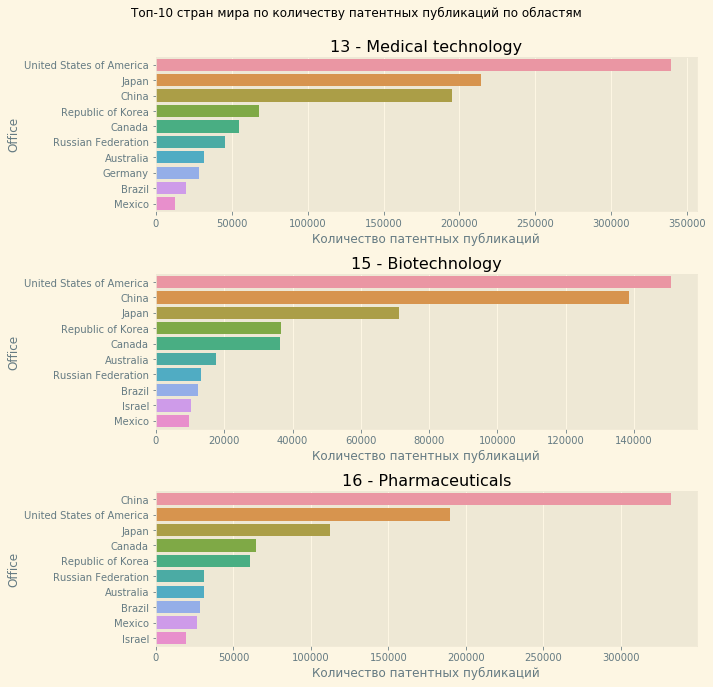

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

plt.suptitle('Топ-10 стран мира по количеству патентных публикаций по областям')
for indx, field in enumerate(df_aux['Field of technology'].unique()):
    ax[indx].title.set_text(f'{field}')
    df_to_plot = df_aux[df_aux['Field of technology'] == field].sort_values(by='Количество патентных публикаций', 
                                                                            ascending=False)[0:10]
    sns.barplot(y=df_to_plot['Office'], x=df_to_plot['Количество патентных публикаций'], ax=ax[indx])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Нарисуем картинку изменения места в рейтинге для (национального патентного офиса) отдельно взятой страны России по отрослям

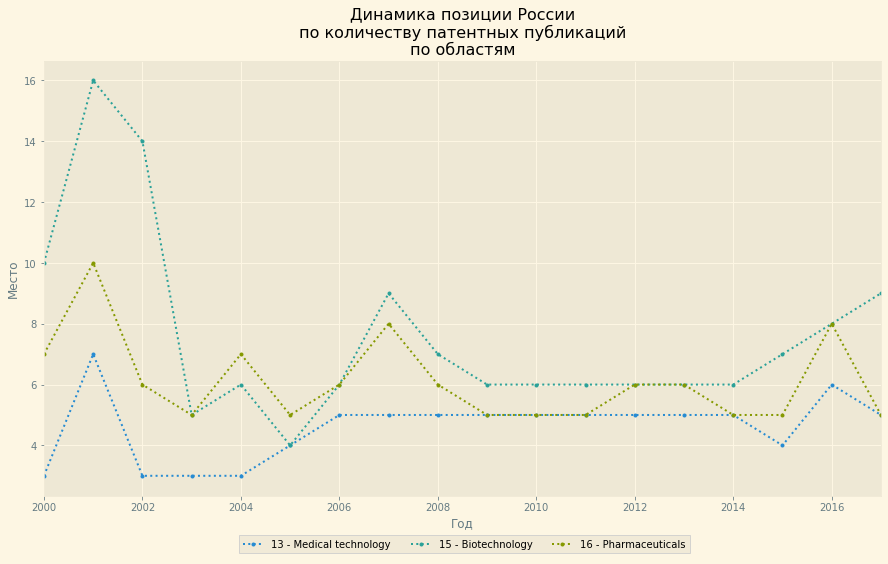

In [19]:
time = pd.date_range(start=pd.datetime(2000, 1, 1), periods=18, freq='1y').year
positions = []
for indx, field in enumerate(df['Field of technology'].unique()):
    places = []
    for year in df.columns[4:]:
        a = df.groupby(['Office', 'Field of technology']).sum().reset_index()
        b = a[a['Field of technology'] == field][['Office', year]].sort_values(year, 
                        ascending=False).reset_index()
        places.append(b[b.Office == 'Russian Federation'].index.values[0])
    positions.append(places)

fig, ax = plt.subplots(figsize=(15, 8))
pd.DataFrame(positions, columns=time, index=df['Field of technology'].unique()).T.plot(linestyle='dotted', 
                                                                                       marker='.', legend=False,
                                                                                       ax=ax)
plt.title('Динамика позиции России\nпо количеству патентных публикаций\nпо областям')
plt.ylabel('Место')
plt.xlabel('Год')
fig.legend(loc='lower center', bbox_to_anchor=(0.43, 0.01),
           fancybox=False, shadow=False, ncol=3);
#plt.tight_layout()

Нарисуем картинку изменения значений показателя для (национального патентного офиса) отдельно взятой страны по отрослям

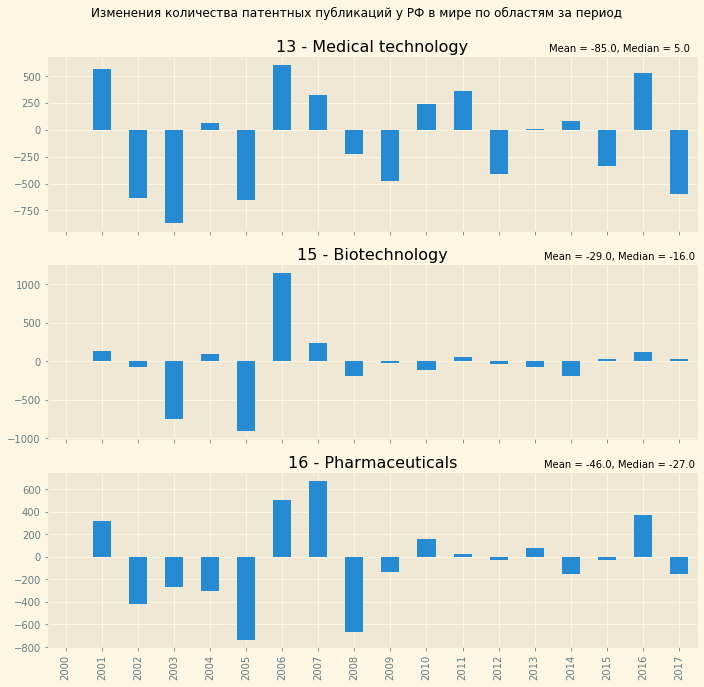

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True)
#plt.style.use('Solarize_Light2')
fig.suptitle('Изменения количества патентных публикаций у РФ в мире по областям за период')
for indx, field in enumerate(df_aux['Field of technology'].unique()):
    ax[indx].title.set_text(f'{field}')
    df_to_plot = df[df.Office == 'Russian Federation'][df[df.Office == 'Russian Federation'].columns[4:]]\
        .set_index(df['Field of technology'].unique()).rolling(2, axis=1).\
        apply(lambda x: x[0] - x[-1], raw=True).iloc[indx]
    df_to_plot.plot.bar(ax=ax[indx])
    ax[indx].text(x=0.88, y=1.05, 
                  s=(f'''Mean = {df_to_plot.describe()['mean'].round(0)}, Median = {df_to_plot.describe()['50%'].round(0)}'''),
                  horizontalalignment='center',
                  verticalalignment='center',
                  transform = ax[indx].transAxes);
                  
    #for i, v in enumerate(df_to_plot.values):
    #    if i != 0:
    #        ax[indx].text(y=v + 10 if v>0 else v-100, x=i - 0.30, s=str(int(round(v, 0))), color='blue', fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

[К содержанию](#Содержание)

### Показатель: Удельный вес патентных публикаций резидентов и нерезидентов в России

* В целом
* По областям

Что использовал:

```Reporting type: Resident and non-resident count by filing office
Indicator: 4 - Patent publications by technology
```

Вопросы: 
* отсутствуют

In [21]:
df_resident_and_non = select_only_countries(read_df('patent_4 - Patent publications by technology_Resident and non-resident count by filing office_2000_2017.csv',
            col_names));
display(df_resident_and_non.head(4))

Shape is 572 rows x 22 columns
Shape is 482 rows x 22 columns


,Office,Office (Code),Origin,Field of technology,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
18,Algeria,DZ,Resident,13 - Medical technology,NaN,NaN,1.0,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Algeria,DZ,Resident,15 - Biotechnology,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Algeria,DZ,Resident,16 - Pharmaceuticals,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,Algeria,DZ,Non-Resident,13 - Medical technology,NaN,6.0,7.0,2.0,9.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_resident_and_non[df_resident_and_non.Office == 'Russian Federation'].groupby(['Field of technology']).sum().T.sum()

Field of technology
13 - Medical technology    45419.0
15 - Biotechnology         13319.0
16 - Pharmaceuticals       31038.0
dtype: float64

In [23]:
df_aux_resident_and_non = df_resident_and_non[df_resident_and_non.Office == \
                    'Russian Federation'].groupby(['Origin', 'Field of technology']).sum().T.sum().reset_index()

aux_percentages = df_resident_and_non[df_resident_and_non.Office == 'Russian Federation'].groupby(['Origin', 'Field of technology']).sum().T.sum() / \
df_resident_and_non[df_resident_and_non.Office == 'Russian Federation'].groupby(['Field of technology']).sum().T.sum()

df_aux_resident_and_non.columns = ['Origin', 'Field of technology', 'Количество патентных публикаций']
#df_aux_resident_and_non['Количество патентных публикаций,\nотносительное'] = aux_percentages.round(2).values
#del aux_percentages
df_aux_resident_and_non.head()

,Origin,Field of technology,Количество патентных публикаций
0,Non-Resident,13 - Medical technology,10908.0
1,Non-Resident,15 - Biotechnology,5468.0
2,Non-Resident,16 - Pharmaceuticals,14931.0
3,Resident,13 - Medical technology,34511.0
4,Resident,15 - Biotechnology,7851.0


In [24]:
assert all(df_aux[df_aux.Office == 'Russian Federation'].iloc[:, -1].values == \
           df_aux_resident_and_non.groupby('Field of technology').sum().reset_index().iloc[:, -1].values), \
    'Сумма резиденты/не резиденты не равно сумме по стране (Total)'

Построим графики

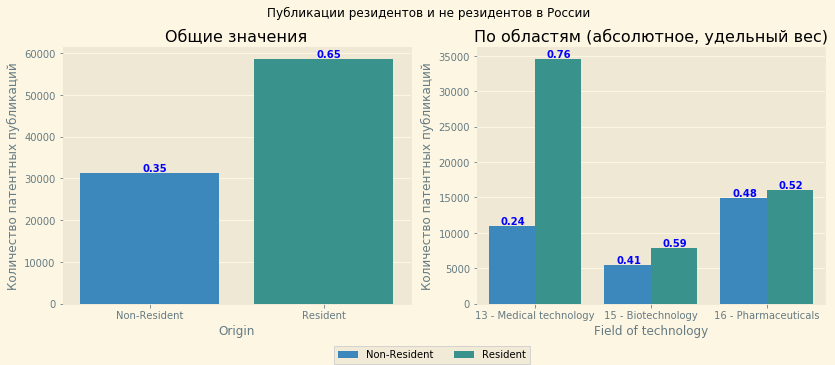

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#first plot
ax[0].title.set_text('Общие значения')

aux_persentages_2 = df_aux_resident_and_non.groupby('Origin').sum().values.flatten() /\
    df_aux_resident_and_non.groupby('Origin').sum().values.sum()
sns.barplot(data=df_aux_resident_and_non.groupby('Origin').sum().reset_index(), x='Origin',
               y='Количество патентных публикаций', ci=None, ax=ax[0])
for i, v in enumerate(df_aux_resident_and_non.groupby('Origin').sum().values.flatten()):
    ax[0].text(y=v + 500, x=i - 0.04, s=str(aux_persentages_2.round(2)[i]), color='blue', fontweight='bold')      
del aux_persentages_2
    
# second plot
sns.barplot(data=df_aux_resident_and_non, x='Field of technology',
               y='Количество патентных публикаций', hue='Origin', ax=ax[1])
for i, v in enumerate(df_aux_resident_and_non['Количество патентных публикаций'].values):
    ax[1].text(y=v + 250, x=i - 0.3, s=str(aux_percentages.round(2)[i]), color='blue', fontweight='bold')
    ax[1].text(y=df_aux_resident_and_non['Количество патентных публикаций'].values[i +3] + 250, 
            x=i + 0.1, s=str(aux_percentages.round(2)[i + 3]), color='blue', fontweight='bold')
    if i == 2: break    
ax[1].title.set_text('По областям (абсолютное, удельный вес)')
ax[1].legend_.remove()

# main plot
fig.suptitle('Публикации резидентов и не резидентов в России', fontsize=12)
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.01),
           fancybox=False, shadow=False, ncol=2)

fig.tight_layout(rect=[0, 0.03, 1., 0.95])

[К содержанию](#Содержание)

### Показатель: Число зарубежных патентных публикаций в России

Что использовал:

```Reporting type: Count by filing office and applicant's origin
Indicator: 4 - Patent publications by technology```

Вопросы: 
* отсутствуют

In [26]:
df_to_russia_from_origin = select_only_countries(read_df('''patent_4 - Patent publications by technology_Count by filing office and applicant's origin_2000_2017.csv''',
       col_names))
df_to_russia_from_origin.tail(3)

Shape is 241 rows x 22 columns
Shape is 241 rows x 22 columns


,Office,Office (Code),Origin,Field of technology,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
238,Russian Federation,RU,South Africa,13 - Medical technology,NaN,NaN,NaN,1.0,NaN,1.0,...,1.0,NaN,1.0,1.0,NaN,2.0,1.0,4.0,1.0,3.0
239,Russian Federation,RU,South Africa,15 - Biotechnology,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
240,Russian Federation,RU,South Africa,16 - Pharmaceuticals,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN


In [27]:
df_aux_to_russia_from_origin = df_to_russia_from_origin.groupby(['Origin', 'Field of technology']).sum().T.sum().reset_index()
df_aux_to_russia_from_origin.columns = ['Origin', 'Field of technology', 'Количество патентных публикаций']

Нарисуем картинку рейтинга патентных публикаций в России.

> _Данные рейтинга не нормированы: значит ли это, что если США имеет самые большие значения по миру, то в РФ они будут иметь схожие по месту значения и важно ли это?_

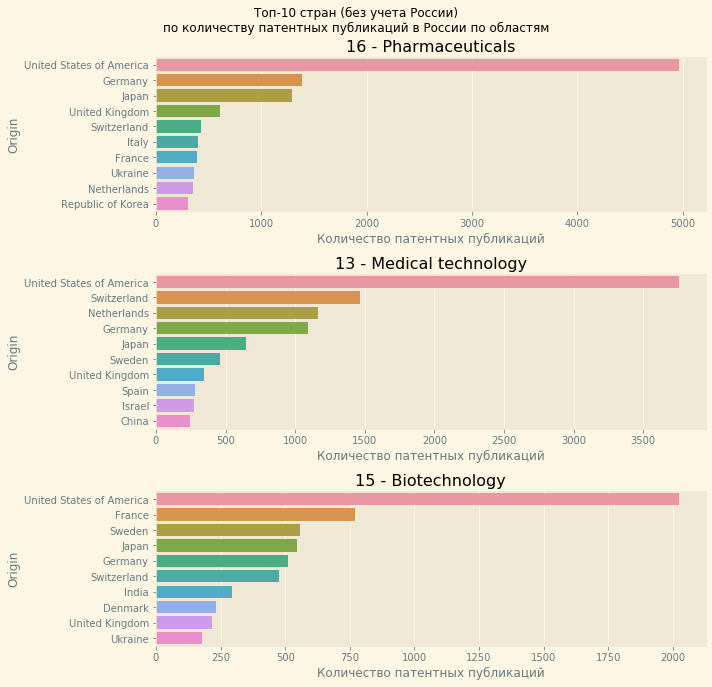

In [28]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
plt.suptitle('Топ-10 стран (без учета России)\nпо количеству патентных публикаций в России по областям')

for indx, field in enumerate(df_aux_to_russia_from_origin['Field of technology'].unique()):
    ax[indx].title.set_text(f'{field}')
    df_to_plot = df_aux_to_russia_from_origin[df_aux['Field of technology'] == field].sort_values(by='Количество патентных публикаций', 
                                                                            ascending=False)[1:11]
    sns.barplot(y=df_to_plot['Origin'], x=df_to_plot['Количество патентных публикаций'], ax=ax[indx])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

[К содержанию](#Содержание)